In [1]:
!pip install opencv-python

In [1]:
%matplotlib inline

from PIL import Image
import cv2
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc 
import glob
import imageio


In [2]:
 example_rock ="C:/Users/win10/Downloads/Vision_Project_Startup_Code/calibration_images/example_rock1.jpg"

In [3]:
example_rock2="C:/Users/win10/Downloads/Vision_Project_Startup_Code/calibration_images/example_rock2.jpg"

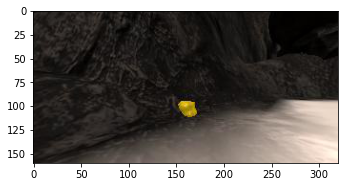

In [13]:
rock_img =mpimg.imread(example_rock2)

fig =plt.figure(figsize=(12,3))
plt.subplot(121)
plt.imshow(rock_img)

In [14]:
Image_example=Image.open(r"C:\Users\win10\Downloads\Vision_Project_Startup_Code\calibration_images\example_rock1.jpg")

In [15]:
Image_Obstacle=Image_example.crop((100,25,325,80))

In [16]:
Image_Obstacle.show()

In [17]:
image2.show()

NameError: name 'image2' is not defined

In [ ]:
image_array=np.array(image2)

In [ ]:
# detect the color of the rock in order to choose the appropriate threshold
# Lower and Higher boundaries of yellow color
# H -> 15-35, S -> 150-255, V -> 20-255
def detect_rock(rock_img,lower,upper):
    bgr_rock = cv2.cvtColor(rock_img,cv2.COLOR_RGB2BGR)
    hsv_rock = cv2.cvtColor(bgr_rock,cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv_rock,lower,upper)
    
    # define the kernal
    kernel = np.ones((5, 5), np.uint8)  
    #close operation
    detected_rock = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    #open operation
    detected_rock = cv2.morphologyEx(detected_rock, cv2.MORPH_CLOSE, kernel)
    detected_rock_rgb = cv2.cvtColor(detected_rock,cv2.COLOR_BGR2RGB)  
    return detected_rock_rgb
#cv2.imshow('rock',detected_rock)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
#rock = detect_rock(rock_img) 
#plt.imshow(rock)

In [ ]:
lower_rock  = np.array([15,150,20])
upper_rock = np.array([35,255,255])

In [ ]:
lower_ground_new = np.array([0, 0, 174])
upper_ground_new = np.array([139, 103, 255])

In [ ]:
lower_obstacles_new = np.array([0, 0, 88])
upper_obstacles_new = np.array([179, 255, 255])

In [ ]:
rock_img =mpimg.imread(example_rock)

fig =plt.figure(figsize=(12,3))
plt.subplot(121)
plt.imshow(rock_img)

In [ ]:
lower = np.array([97, 0, 187])
upper = np.array([139, 104, 255])

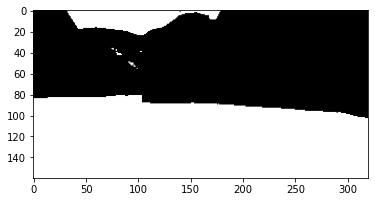

In [18]:
#cv2.imshow('rock',np.array(Image_example))
#cv2.waitKey(0)
#v2.destroyAllWindows()
rock = detect_rock(np.array(Image_example),(0, 0, 88),(179, 255, 255)
                  ) 
plt.imshow(rock)

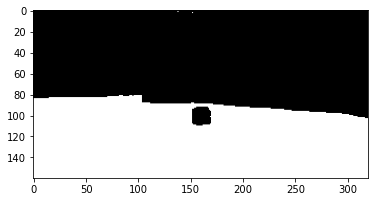

In [19]:
#cv2.imshow('rock',np.array(Image_example))
#cv2.waitKey(0)
#v2.destroyAllWindows()
rock = detect_rock(np.array(Image_example),(88, 0, 136),(179, 114, 255)
                  ) 
plt.imshow(rock)

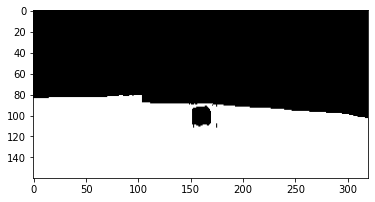

In [20]:
#cv2.imshow('rock',np.array(Image_example))
#cv2.waitKey(0)
#v2.destroyAllWindows()
rock = detect_rock(np.array(Image_example),(98, 18, 136),(179, 107, 255)
                  ) 
plt.imshow(rock)

In [21]:
def color_thresh(img, rgb_thresh=(160, 160, 160)):
    # Create an array of zeros same xy size as img, but single channel
    color_select = np.zeros_like(img[:,:,0])
    # Require that each pixel be above all three threshold values in RGB
    # above_thresh will now contain a boolean array with "True"
    # where threshold was met
    above_thresh = (img[:,:,0] > rgb_thresh[0]) \
                & (img[:,:,1] > rgb_thresh[1]) \
                & (img[:,:,2] > rgb_thresh[2])
    # Index the array of zeros with the boolean array and set to 1
    color_select[above_thresh] = 1
    # Return the binary image
    return color_select

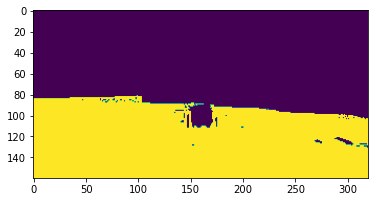

In [22]:
plt.imshow(color_thresh(np.array(Image_example)))

In [23]:
def ground_thres(img, obstecals_mask,rock_mask):
    # Create an array of zeros same xy size as img, but single channel
    color_select = np.zeros_like(img[:,:,0])
    # Require that each pixel be above all three threshold values in RGB
    # above_thresh will now contain a boolean array with "True"
    # where threshold was met
    above_thresh = (img[:,:,0]> lower_limit[0]) \
                | (img[:,:,1] > lower_limit[1])  \
                | (img[:,:,2] > lower_limit[2]) 
    # Index the array of zeros with the boolean array and set to 1
    color_select[above_thresh] = 1
    # Return the binary image
    return color_select



In [24]:
bgr_rock = cv2.cvtColor(np.array(Image_example),cv2.COLOR_RGB2BGR)
hsv_rock = cv2.cvtColor(bgr_rock,cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv_rock,(88, 0, 136),(179, 114, 255)
                  ) 

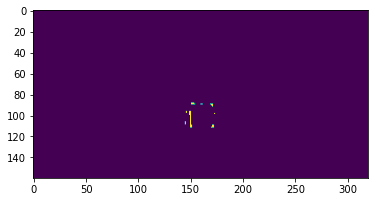

In [25]:
plt.imshow(mask)

In [26]:
def ground_thres(image, lower_limit=(0, 0, 136),upper_limit=(179, 141, 255)):
    bgr_rock = cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
    hsv_rock = cv2.cvtColor(bgr_rock,cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv_rock,lower_limit,upper_limit)
    res = cv2.bitwise_and(np.array(Image_example), np.array(Image_example), mask=mask)
    detected_rock_rgb = cv2.cvtColor(res,cv2.COLOR_BGR2GRAY)

In [27]:
bgr_rock = cv2.cvtColor(np.array(Image_example),cv2.COLOR_RGB2BGR)
hsv_rock = cv2.cvtColor(bgr_rock,cv2.COLOR_BGR2HSV)
#def rock_hsv():
mask = cv2.inRange(hsv_rock,(0, 0, 136),(179, 141, 255))
res = cv2.bitwise_and(np.array(Image_example), np.array(Image_example), mask=mask)
#kernel = np.ones((5, 5), np.uint8)

# defining the closing function 
# over the image and structuring element
# detected_rock = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
# detected_rock = cv2.morphologyEx(detected_rock, cv2.MORPH_CLOSE, kernel)
#detected_rock = cv2.bitwise_and(bgr_rock,bgr_rock,mask=mask)
detected_rock_rgb = cv2.cvtColor(res,cv2.COLOR_BGR2GRAY)

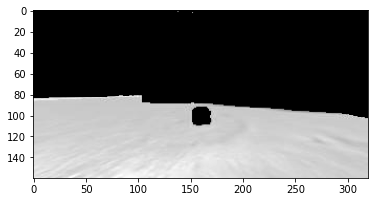

In [28]:
plt.imshow(detected_rock_rgb,cmap='gray')

In [29]:
bgr_rock = cv2.cvtColor(rock_img,cv2.COLOR_RGB2BGR)
hsv_rock = cv2.cvtColor(bgr_rock,cv2.COLOR_BGR2HSV)
#def rock_hsv():
mask = cv2.inRange(hsv_rock,(0, 0, 143),(179, 119, 255))
#  return mask

kernel = np.ones((5, 5), np.uint8)

# defining the closing function 
# over the image and structuring element
detected_rock = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
detected_rock = cv2.morphologyEx(detected_rock, cv2.MORPH_CLOSE, kernel)
#detected_rock = cv2.bitwise_and(bgr_rock,bgr_rock,mask=mask)
detected_rock_rgb = cv2.cvtColor(detected_rock,cv2.COLOR_BGR2RGB)


In [30]:
def obstacle_thresh(img, rgb_thresh=(160, 160, 160)):
    # Create an array of zeros same xy size as img, but single channel
    color_select = np.zeros_like(img[:,:,0])
    # Require that each pixel be above all three threshold values in RGB
    # above_thresh will now contain a boolean array with "True"
    # where threshold was met
    below_thresh = (img[:,:,0] < rgb_thresh[0]) \
                | (img[:,:,1] < rgb_thresh[1]) \
                | (img[:,:,2] < rgb_thresh[2])
    # Index the array of zeros with the boolean array and set to 1
    color_select[below_thresh] = 1
    # Return the binary image
    return color_select



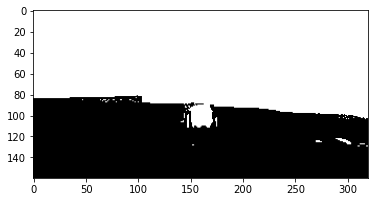

In [31]:
threshed_ground = obstacle_thresh(np.array(Image_example))
plt.imshow(threshed_ground,cmap='gray')

In [32]:
def ground_thresh(img, rgb_thresh=(160, 160, 160)):
    # Create an array of zeros same xy size as img, but single channel
    color_select = np.zeros_like(img[:,:,0])
    # Require that each pixel be above all three threshold values in RGB
    # above_thresh will now contain a boolean array with "True"
    # where threshold was met
    above_thresh = (img[:,:,0] > rgb_thresh[0]) \
                & (img[:,:,1] > rgb_thresh[1]) \
                & (img[:,:,2] > rgb_thresh[2])
    # Index the array of zeros with the boolean array and set to 1
    color_select[above_thresh] = 1
    # Return the binary image
    return color_select

 

In [33]:
def color_thresh(img, rgb_thresh=(160, 160, 160)):
    # Create an array of zeros same xy size as img, but single channel
    color_select = np.zeros_like(img[:,:,0])
    # Require that each pixel be above all three threshold values in RGB
    # above_thresh will now contain a boolean array with "True"
    # where threshold was met
    above_thresh = (img[:,:,0] > rgb_thresh[0]) \
                & (img[:,:,1] > rgb_thresh[1]) \
                & (img[:,:,2] > rgb_thresh[2])
    # Index the array of zeros with the boolean array and set to 1
    color_select[above_thresh] = 1
    # Return the binary image
    return color_select
 

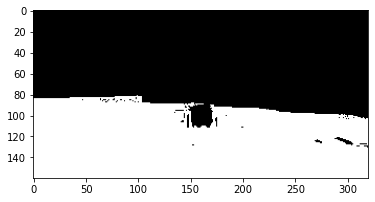

In [34]:
threshed_ground = color_thresh(np.array(Image_example))
plt.imshow(threshed_ground,cmap='gray')

In [35]:
def detect_obstecals(image,lower=(0, 0, 88),upper=(179, 255, 255)):
#     bgr_obstecals = cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
    hsv_obsteclas = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv_obsteclas,lower,upper)  
    # define the kernal
    kernel = np.ones((5, 5), np.uint8)  
    #close operation
    detected_obstacle = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    #open operation
    detected_obstacle = cv2.morphologyEx(detected_obstacle, cv2.MORPH_CLOSE, kernel)
    detected_obstacle_rgb = cv2.cvtColor(detected_obstacle,cv2.COLOR_BGR2RGB)  
    #invert the white and black pixels
    detected_obstacles_image =np.invert(detected_obstacle_rgb)
    return detected_obstacles_image   

In [7]:
#finding hsv range of target object(pen)
import cv2
import numpy as np
import time
# A required callback method that goes into the trackbar function.
def nothing(x):
    pass

# Initializing the webcam feed.
cap = cv2.VideoCapture(0)
cap.set(3,1280)
cap.set(4,720)

# Create a window named trackbars.
cv2.namedWindow("Trackbars")

# Now create 6 trackbars that will control the lower and upper range of 
# H,S and V channels. The Arguments are like this: Name of trackbar, 
# window name, range,callback function. For Hue the range is 0-179 and
# for S,V its 0-255.
cv2.createTrackbar("L - H", "Trackbars", 0, 179, nothing)
cv2.createTrackbar("L - S", "Trackbars", 0, 255, nothing)
cv2.createTrackbar("L - V", "Trackbars", 0, 255, nothing)
cv2.createTrackbar("U - H", "Trackbars", 179, 179, nothing)
cv2.createTrackbar("U - S", "Trackbars", 255, 255, nothing)
cv2.createTrackbar("U - V", "Trackbars", 255, 255, nothing)
 
while True:
    
    # Start reading the webcam feed frame by frame.
    frame =np.array(Image_example)
    #if not ret:
        #break
    # Flip the frame horizontally (Not required)
    #frame = cv2.flip( frame, 1 ) 
    
    # Convert the BGR image to HSV image.
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    # Get the new values of the trackbar in real time as the user changes 
    # them
    l_h = cv2.getTrackbarPos("L - H", "Trackbars")
    l_s = cv2.getTrackbarPos("L - S", "Trackbars")
    l_v = cv2.getTrackbarPos("L - V", "Trackbars")
    u_h = cv2.getTrackbarPos("U - H", "Trackbars")
    u_s = cv2.getTrackbarPos("U - S", "Trackbars")
    u_v = cv2.getTrackbarPos("U - V", "Trackbars")
 
    # Set the lower and upper HSV range according to the value selected
    # by the trackbar
    lower_range = np.array([l_h, l_s, l_v])
    upper_range = np.array([u_h, u_s, u_v])
    
    # Filter the image and get the binary mask, where white represents 
    # your target color
    mask = cv2.inRange(hsv, lower_range, upper_range)
 
    # You can also visualize the real part of the target color (Optional)
    res = cv2.bitwise_and(frame, frame, mask=mask)
    
    # Converting the binary mask to 3 channel image, this is just so 
    # we can stack it with the others
    mask_3 = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
    
    # stack the mask, orginal frame and the filtered result
    stacked = np.hstack((mask_3,frame,res))
    
    # Show this stacked frame at 40% of the size.
    cv2.imshow('Trackbars',cv2.resize(stacked,None,fx=1.0,fy=1.0))
    
    # If the user presses ESC then exit the program
    key = cv2.waitKey(1)
    if key == 27:
        break
    
    # If the user presses `s` then print this array.
    if key == ord('s'):
        
        thearray = [[l_h,l_s,l_v],[u_h, u_s, u_v]]
        print(thearray)
        
        # Also save this array as penval.npy
        np.save('hsv_value',thearray)
        break
    
# Release the camera & destroy the windows.    
#cap.release()
cv2.destroyAllWindows()

[[0, 52, 0], [179, 255, 255]]


In [36]:
def ground_thres(image, lower_limit=(0, 0, 150),upper_limit=(153, 131, 255)):
    bgr_ground = cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
    hsv_ground = cv2.cvtColor(bgr_ground,cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv_ground,lower_limit,upper_limit)
    return mask

In [37]:
def detect_rock(image,lower=(91, 85, 84),upper=(102, 255, 255)):
    hsv_rock = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv_rock,lower,upper)  
    #res = cv2.bitwise_and(image, image, mask=mask)
    detected_rock_image = cv2.cvtColor(mask,cv2.COLOR_GRAY2BGR)  
    return detected_rock_image

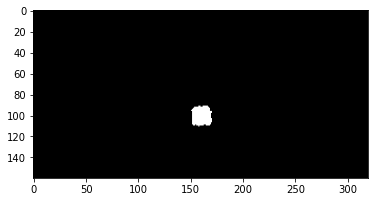

In [38]:

hsv = cv2.cvtColor(np.array(Image_example), cv2.COLOR_BGR2HSV)
hsv_rock = cv2.cvtColor(bgr_rock,cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv,(91, 91, 99),(101, 255, 250)) 
detected_rock_image = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
mask
plt.imshow(detected_rock_image)

In [39]:
 def detect_obstecals(image,lower=(0, 0, 88),upper=(179, 255, 255)):
    bgr_obstecals = cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
    hsv_obsteclas = cv2.cvtColor(bgr_obstecals,cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv_obsteclas,lower,upper)  
    # define the kernal
    kernel = np.ones((5, 5), np.uint8)  
    #close operation
    detected_obstacle = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    #open operation
    detected_obstacle = cv2.morphologyEx(detected_obstacle, cv2.MORPH_CLOSE, kernel)
    detected_obstacle_rgb = cv2.cvtColor(detected_obstacle,cv2.COLOR_BGR2RGB)  
    #invert the white and black pixels
    detected_obstacles_image =np.invert(detected_obstacle_rgb)
    return detected_obstacles_image   

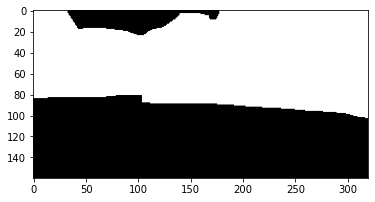

In [40]:
plt.imshow(detect_obstecals(np.array(Image_example)[:,:,0]),cmap='gray')

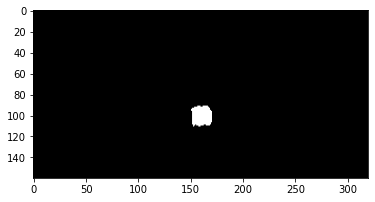

In [41]:
plt.imshow(detect_rock(np.array(Image_example)))

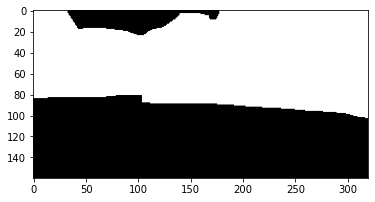

In [42]:
plt.imshow(detect_obstecals(np.array(Image_example)))

In [43]:
Image_example=Image.open(r"C:\Users\win10\Downloads\Vision_Project_Startup_Code\calibration_images\example_rock2.jpg")  


In [46]:
def mask_obstacles_or_rock(image,lower_limit=(106, 0, 75),upper_limit=(115, 41, 152)):
    hsv_sky = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
    #invert the white and black pixels
    mask = cv2.inRange(hsv_sky,lower_limit,upper_limit)
    # mask = cv2.cvtColor(mask,cv2.COLOR_BGR2RGB)
    mask =np.invert(mask)

    kernel = np.ones((5, 5), np.uint8)  
    #close operation
    detected_obstacle = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    #open operation
    detected_obstacle = cv2.morphologyEx(detected_obstacle, cv2.MORPH_CLOSE, kernel)
    detected_obstacle_rgb = cv2.cvtColor(detected_obstacle,cv2.COLOR_BGR2RGB)
    detected_obstacles_image =np.invert(detected_obstacle_rgb)
    return detected_obstacles_image

In [50]:
def ground_thres(image,lower_limit=(0, 0, 73),upper_limit=(179, 56, 255)):
    bgr_ground = cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
    hsv_ground = cv2.cvtColor(bgr_ground,cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv_ground,lower_limit,upper_limit)
    return mask

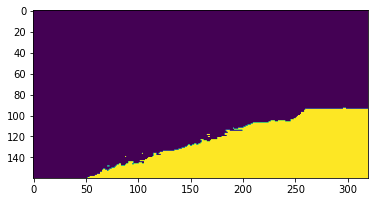

In [52]:
plt.imshow(ground_thres(np.array(Image_example)))

In [53]:
def ground_thres_new(image,mask_obstacles, mask_rock ):
    mask_obstacles_or_rock =cv2.bitwise_or(mask_obstacles,mask_rock,mask=None) 
    mask_ground =np.invert(mask_obstacles_or_rock)
    return mask_ground
    

In [54]:
new_im=ground_thres_new(np.array(Image_example),     #sky_thres(np.array(Image_example)),
                detect_rock(np.array(Image_example)),
                 detect_obstecals(np.array(Image_example)))

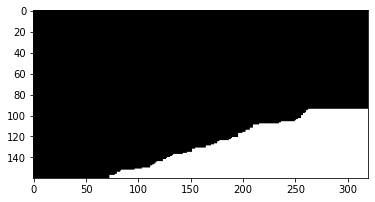

In [55]:
plt.imshow(new_im)

In [56]:
mask_obstacles_or_rock =cv2.bitwise_or(
    detect_rock(np.array(Image_example)),

    detect_obstecals(np.array(Image_example))
  ,mask=None)

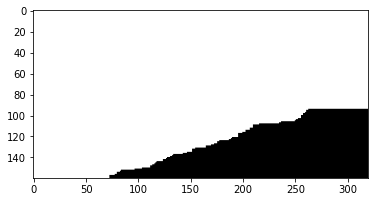

In [57]:
plt.imshow(mask_obstacles_or_rock)

In [59]:
def perspect_transform(img,src,dst):
    M=cv2.getPerspectiveTransform(src,dst)
    wared=cv2.warpPerspective(img,M,(img.shape[1],img.shape[0]))
    return wared
 

In [60]:
path = r'C:\Users\win10\Downloads\Vision_Project_Startup_Code\calibration_images\example_rock1.jpg'

In [61]:
grid_img =mpimg.imread(path)

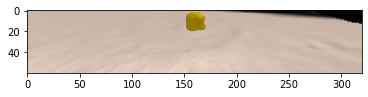

In [62]:
dst=3
bottom_offset=5
croprd_image=grid_img[90:150,:]
plt.imshow(croprd_image)
gry=cv2.cvtColor(croprd_image,cv2.COLOR_BGR2GRAY)
corners=cv2.goodFeaturesToTrack(gry,5,0.01,80)

In [63]:
corners

array([[[310.,  11.]],

       [[153.,  18.]],

       [[ 32.,  58.]]], dtype=float32)

In [64]:
corners=np.int0(corners)

In [65]:
def calc_source_and_destination(img):
    dst=3
    bottom_offset=5
    croprd_image=img[90:150,:]
    plt.imshow(croprd_image)
    gry=cv2.cvtColor(croprd_image,cv2.COLOR_BGR2GRAY)
    corners=cv2.goodFeaturesToTrack(gry,5,0.01,80)
    corners=np.int0(corners)
    x=[]
    y=[]
    for i in corners:
        b,n=i.ravel()
        print(b,n)
        x.append(b)
        y.append(n)

    source =np.float32([[x[2],y[2]+60],
                      [x[3],y[3]+60],
                      [x[0],y[0]+60],
                       [x[1],y[1]+60]])         
    destination =np.float32([[img.shape[1]/2-dst,img.shape[0]-bottom_offset],
                             [img.shape[1]/2+dst,img.shape[0]-bottom_offset],
                             [img.shape[1]/2+dst,img.shape[0]-2*dst-bottom_offset],
                             [img.shape[1]/2-dst,img.shape[0]-2*dst-bottom_offset]])
    
    return source, destination

310 11
153 18
32 58


IndexError: list index out of range

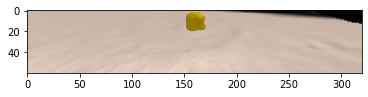

In [67]:
source, destination =calc_source_and_destination(grid_img)
warped= perspect_transform(grid_img,source,destination) 
plt.imshow(warped)

In [69]:
def ground_thres_new(image,mask_obstacles, mask_rock ):
    mask_obstacles_or_rock =cv2.bitwise_or(mask_obstacles,mask_rock,mask=None) 
    mask_ground =np.invert(mask_obstacles_or_rock)
    return mask_ground

In [70]:
def detect_obstecals(image,lower=(0, 0, 88),upper=(179, 255, 255)):
    #bgr_obstecals = cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
    hsv_obsteclas = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv_obsteclas,lower,upper)  
    # define the kernal
    kernel = np.ones((5, 5), np.uint8)  
    #close operation
    detected_obstacle = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    #open operation
    detected_obstacle = cv2.morphologyEx(detected_obstacle, cv2.MORPH_CLOSE, kernel)
    detected_obstacle_rgb = cv2.cvtColor(detected_obstacle,cv2.COLOR_BGR2RGB)  
    #invert the white and black pixels
    detected_obstacles_image =np.invert(detected_obstacle_rgb)
    return detected_obstacles_image 

In [71]:
def detect_rock(image,lower=(91, 85, 84),upper=(102, 255, 255)):
    hsv_rock = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv_rock,lower,upper)  
    #res = cv2.bitwise_and(image, image, mask=mask)
    #detected_rock_image = cv2.cvtColor(mask,cv2.COLOR_GRAY2BGR)  
    return mask

In [72]:
image=detect_obstecals(np.array(Image_example))

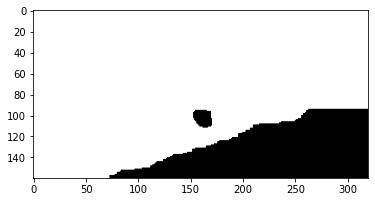

In [73]:
plt.imshow(image)

In [74]:
image


array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

In [75]:
worldmap = np.zeros((200, 200, 3), dtype=float) 

In [76]:
worldmap.shape[1] 

200

In [77]:
def is_obstacles_at_left(Image,shape_x,shape_y):
    cropped_Image=Image.crop(((shape_x/3),0,(2*(shape_x/3)),shape_y))
    if(cv2.countNonZero(np.array(cropped_Image))>20): #20 in case if noises exist
        return 1
    return 0

In [79]:
x,y=Image_example.size

In [80]:
box=((x/3),0,(2*(x/3)),y)
new_Image=detect_obstecals(np.array(Image_example))

In [82]:
plt.imshow(np.array(cropped_Image))

NameError: name 'cropped_Image' is not defined

In [83]:
import numpy as np
import cv2

# Identify pixels above the threshold
# Threshold of RGB > 160 does a nice job of identifying ground pixels only
def color_thresh(img, rgb_thresh=(160, 160, 160)):
    # Create an array of zeros same xy size as img, but single channel
    color_select = np.zeros_like(img[:,:,0])
    # Require that each pixel be above all three threshold values in RGB
    # above_thresh will now contain a boolean array with "True"
    # where threshold was met
    above_thresh = (img[:,:,0] > rgb_thresh[0]) \
                & (img[:,:,1] > rgb_thresh[1]) \
                & (img[:,:,2] > rgb_thresh[2])
    # Index the array of zeros with the boolean array and set to 1
    color_select[above_thresh] = 1
    # Return the binary image
    return color_select
 
    
#*********************************************************    
#begin editing 
#function to calculate the source and destination point for the image wraping
def calc_source_and_destination(img):
    dst=3
    bottom_offset=5
    croprd_image=img[90:150,:]
    #plt.imshow(croprd_image)
    gry=cv2.cvtColor(croprd_image,cv2.COLOR_BGR2GRAY)
    corners=cv2.goodFeaturesToTrack(gry,4,0.5,10)
    corners=np.int0(corners)
    x=[]
    y=[]
    for i in corners:
        b,n=i.ravel()
        print(b,n)
        x.append(b)
        y.append(n)

    source =np.float32([[x[2],y[2]+60],
                      [x[3],y[3]+60],
                      [x[0],y[0]+60],
                       [x[1],y[1]+60]])         
    destination =np.float32([[img.shape[1]/2-dst,img.shape[0]-bottom_offset],
                             [img.shape[1]/2+dst,img.shape[0]-bottom_offset],
                             [img.shape[1]/2+dst,img.shape[0]-2*dst-bottom_offset],
                             [img.shape[1]/2-dst,img.shape[0]-2*dst-bottom_offset]])
    
    return source, destination

#funciton to identify the ground pixels
#output: 
#ground pixels in white
#other in black
def ground_thres_new(image,mask_obstacles, mask_rock ):
    mask_obstacles_or_rock =cv2.bitwise_or(mask_obstacles,mask_rock,mask=None) 
    mask_ground =np.invert(mask_obstacles_or_rock)
    return mask_ground

def ground_thresh(img, rgb_thresh=(160, 160, 160)):
    # Create an array of zeros same xy size as img, but single channel
    color_select = np.zeros_like(img[:,:,0])
    # Require that each pixel be above all three threshold values in RGB
    # above_thresh will now contain a boolean array with "True"
    # where threshold was met
    above_thresh = (img[:,:,0] > rgb_thresh[0]) \
                & (img[:,:,1] > rgb_thresh[1]) \
                & (img[:,:,2] > rgb_thresh[2])
    # Index the array of zeros with the boolean array and set to 1
    color_select[above_thresh] = 1
    # Return the binary image
    return color_select


#funciton to identify the rock pixels
#output: 
#rock pixels in white
#other in black

def rock_thresh(img, rgb_thresh=(0, 0, 0)):
    # Create an array of zeros same xy size as img, but single channel
    color_select = np.zeros_like(img[:,:,0])
    # Require that each pixel be above all three threshold values in RGB
    # above_thresh will now contain a boolean array with "True"
    # where threshold was met
    above_thresh = (img[:,:,0] > rgb_thresh[0]) \
                | (img[:,:,1] > rgb_thresh[1]) \
                | (img[:,:,2] > rgb_thresh[2])
    # Index the array of zeros with the boolean array and set to 1
    color_select[above_thresh] = 1
    # Return the binary image
    return color_select

def detect_rock(image,lower=(91, 85, 84),upper=(102, 255, 255)):
    hsv_rock = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv_rock,lower,upper)  
    #res = cv2.bitwise_and(image, image, mask=mask)
    detected_rock_image = cv2.cvtColor(mask,cv2.COLOR_GRAY2BGR)  
    return detected_rock_image[:,:,0]

#funciton to identify the obstecals pixels
#output: 
#obstecals pixels in white
#other in black
def obstacle_thresh(img, rgb_thresh=(160, 160, 160)):
    # Create an array of zeros same xy size as img, but single channel
    color_select = np.zeros_like(img[:,:,0])
    # Require that each pixel be above all three threshold values in RGB
    # above_thresh will now contain a boolean array with "True"
    # where threshold was met
    below_thresh = (img[:,:,0] < rgb_thresh[0]) \
                | (img[:,:,1] < rgb_thresh[1]) \
                | (img[:,:,2] < rgb_thresh[2])
    # Index the array of zeros with the boolean array and set to 1
    color_select[below_thresh] = 1
    # Return the binary image
    return color_select


def detect_obstecals(image,lower=(0, 0, 88),upper=(179, 255, 255)):
   # bgr_obstecals = cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
    hsv_obsteclas = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv_obsteclas,lower,upper)  
    # define the kernal
    kernel = np.ones((5, 5), np.uint8)  
    #close operation
    detected_obstacle = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    #open operation
    detected_obstacle = cv2.morphologyEx(detected_obstacle, cv2.MORPH_CLOSE, kernel)
    detected_obstacle_rgb = cv2.cvtColor(detected_obstacle,cv2.COLOR_BGR2RGB)  
    #invert the white and black pixels
    detected_obstacles_image =np.invert(detected_obstacle_rgb)
    return detected_obstacles_image[:,:,0]   


#Define a function to detect if there obstacles at the:
#center of image
#left of the image
#right of the image

def is_obstacles_at_the_center(Image,shape_x,shape_y):
    cropped_Image=Image[:,0:int(shape_y/3)]
    
    if (cropped_Image.any(axis=-1).sum() >20) : #20 in case if noises exist
        return 1
    return 0

def is_obstacles_at_left(Image,shape_x,shape_y):
    cropped_Image=Image[:,int(shape_y/3):int(2*(shape_y/3))]
    if (cropped_Image.any(axis=-1).sum() >20) : #20 in case if noises exist
        return 1
    return 0

def is_obstacles_at_right(Image,shape_x,shape_y):
    cropped_Image=Image[:,int(2*(shape_y/3)):(shape_y)]
    if (cropped_Image.any(axis=-1).sum() >20) : #20 in case if noises exist
        return 1
    return 0
                             
#end
#*********************************************************    

# Define a function to convert from image coords to rover coords
def rover_coords(binary_img):
    # Identify nonzero pixels
    ypos, xpos = binary_img.nonzero()
    # Calculate pixel positions with reference to the rover position being at the 
    # center bottom of the image.  
    x_pixel = -(ypos - binary_img.shape[0]).astype(np.float)
    y_pixel = -(xpos - binary_img.shape[1]/2 ).astype(np.float)
    return x_pixel, y_pixel


# Define a function to convert to radial coords in rover space
def to_polar_coords(x_pixel, y_pixel):
    # Convert (x_pixel, y_pixel) to (distance, angle) 
    # in polar coordinates in rover space
    # Calculate distance to each pixel
    dist = np.sqrt(x_pixel**2 + y_pixel**2)
    # Calculate angle away from vertical for each pixel
    angles = np.arctan2(y_pixel, x_pixel)
    return dist, angles

# Define a function to map rover space pixels to world space
def rotate_pix(xpix, ypix, yaw):
    # Convert yaw to radians
    yaw_rad = yaw * np.pi / 180
    xpix_rotated = (xpix * np.cos(yaw_rad)) - (ypix * np.sin(yaw_rad))
                            
    ypix_rotated = (xpix * np.sin(yaw_rad)) + (ypix * np.cos(yaw_rad))
    # Return the result  
    return xpix_rotated, ypix_rotated

def translate_pix(xpix_rot, ypix_rot, xpos, ypos, scale): 
    # Apply a scaling and a translation
    xpix_translated = (xpix_rot / scale) + xpos
    ypix_translated = (ypix_rot / scale) + ypos
    # Return the result  
    return xpix_translated, ypix_translated


# Define a function to apply rotation and translation (and clipping)
# Once you define the two functions above this function should work
def pix_to_world(xpix, ypix, xpos, ypos, yaw, world_size, scale):
    # Apply rotation
    xpix_rot, ypix_rot = rotate_pix(xpix, ypix, yaw)
    # Apply translation
    xpix_tran, ypix_tran = translate_pix(xpix_rot, ypix_rot, xpos, ypos, scale)
    # Perform rotation, translation and clipping all at once
    x_pix_world = np.clip(np.int_(xpix_tran), 0, world_size - 1)
    y_pix_world = np.clip(np.int_(ypix_tran), 0, world_size - 1)
    # Return the result
    return x_pix_world, y_pix_world

# Define a function to perform a perspective transform
def perspect_transform(img, src, dst):
           
    M = cv2.getPerspectiveTransform(src, dst)
    warped = cv2.warpPerspective(img, M, (img.shape[1], img.shape[0]))# keep same size as input image
    
    return warped

import numpy as np
import cv2

# Identify pixels above the threshold
# Threshold of RGB > 160 does a nice job of identifying ground pixels only
def color_thresh(img, rgb_thresh=(160, 160, 160)):
    # Create an array of zeros same xy size as img, but single channel
    color_select = np.zeros_like(img[:,:,0])
    # Require that each pixel be above all three threshold values in RGB
    # above_thresh will now contain a boolean array with "True"
    # where threshold was met
    above_thresh = (img[:,:,0] > rgb_thresh[0]) \
                & (img[:,:,1] > rgb_thresh[1]) \
                & (img[:,:,2] > rgb_thresh[2])
    # Index the array of zeros with the boolean array and set to 1
    color_select[above_thresh] = 1
    # Return the binary image
    return color_select
 
    
#*********************************************************    
#begin editing 
#function to calculate the source and destination point for the image wraping
def calc_source_and_destination(img):
    dst=3
    bottom_offset=5
    croprd_image=img[90:150,:]
    #plt.imshow(croprd_image)
    gry=cv2.cvtColor(croprd_image,cv2.COLOR_BGR2GRAY)
    corners=cv2.goodFeaturesToTrack(gry,4,0.5,10)
    corners=np.int0(corners)
    x=[]
    y=[]
    for i in corners:
        b,n=i.ravel()
        print(b,n)
        x.append(b)
        y.append(n)

    source =np.float32([[x[2],y[2]+60],
                      [x[3],y[3]+60],
                      [x[0],y[0]+60],
                       [x[1],y[1]+60]])         
    destination =np.float32([[img.shape[1]/2-dst,img.shape[0]-bottom_offset],
                             [img.shape[1]/2+dst,img.shape[0]-bottom_offset],
                             [img.shape[1]/2+dst,img.shape[0]-2*dst-bottom_offset],
                             [img.shape[1]/2-dst,img.shape[0]-2*dst-bottom_offset]])
    
    return source, destination

#funciton to identify the ground pixels
#output: 
#ground pixels in white
#other in black
def ground_thres_new(image,mask_obstacles, mask_rock ):
    mask_obstacles_or_rock =cv2.bitwise_or(mask_obstacles,mask_rock,mask=None) 
    mask_ground =np.invert(mask_obstacles_or_rock)
    return mask_ground

def ground_thresh(img, rgb_thresh=(160, 160, 160)):
    # Create an array of zeros same xy size as img, but single channel
    color_select = np.zeros_like(img[:,:,0])
    # Require that each pixel be above all three threshold values in RGB
    # above_thresh will now contain a boolean array with "True"
    # where threshold was met
    above_thresh = (img[:,:,0] > rgb_thresh[0]) \
                & (img[:,:,1] > rgb_thresh[1]) \
                & (img[:,:,2] > rgb_thresh[2])
    # Index the array of zeros with the boolean array and set to 1
    color_select[above_thresh] = 1
    # Return the binary image
    return color_select


#funciton to identify the rock pixels
#output: 
#rock pixels in white
#other in black

def rock_thresh(img, rgb_thresh=(0, 0, 0)):
    # Create an array of zeros same xy size as img, but single channel
    color_select = np.zeros_like(img[:,:,0])
    # Require that each pixel be above all three threshold values in RGB
    # above_thresh will now contain a boolean array with "True"
    # where threshold was met
    above_thresh = (img[:,:,0] > rgb_thresh[0]) \
                | (img[:,:,1] > rgb_thresh[1]) \
                | (img[:,:,2] > rgb_thresh[2])
    # Index the array of zeros with the boolean array and set to 1
    color_select[above_thresh] = 1
    # Return the binary image
    return color_select

def detect_rock(image,lower=(91, 85, 84),upper=(102, 255, 255)):
    hsv_rock = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv_rock,lower,upper)  
    #res = cv2.bitwise_and(image, image, mask=mask)
    detected_rock_image = cv2.cvtColor(mask,cv2.COLOR_GRAY2BGR)  
    return detected_rock_image[:,:,0]

#funciton to identify the obstecals pixels
#output: 
#obstecals pixels in white
#other in black
def obstacle_thresh(img, rgb_thresh=(160, 160, 160)):
    # Create an array of zeros same xy size as img, but single channel
    color_select = np.zeros_like(img[:,:,0])
    # Require that each pixel be above all three threshold values in RGB
    # above_thresh will now contain a boolean array with "True"
    # where threshold was met
    below_thresh = (img[:,:,0] < rgb_thresh[0]) \
                | (img[:,:,1] < rgb_thresh[1]) \
                | (img[:,:,2] < rgb_thresh[2])
    # Index the array of zeros with the boolean array and set to 1
    color_select[below_thresh] = 1
    # Return the binary image
    return color_select


def detect_obstecals(image,lower=(0, 0, 88),upper=(179, 255, 255)):
   # bgr_obstecals = cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
    hsv_obsteclas = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv_obsteclas,lower,upper)  
    # define the kernal
    kernel = np.ones((5, 5), np.uint8)  
    #close operation
    detected_obstacle = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    #open operation
    detected_obstacle = cv2.morphologyEx(detected_obstacle, cv2.MORPH_CLOSE, kernel)
    detected_obstacle_rgb = cv2.cvtColor(detected_obstacle,cv2.COLOR_BGR2RGB)  
    #invert the white and black pixels
    detected_obstacles_image =np.invert(detected_obstacle_rgb)
    return detected_obstacles_image[:,:,0]   


#Define a function to detect if there obstacles at the:
#center of image
#left of the image
#right of the image

def is_obstacles_at_the_center(Image,shape_x,shape_y):
    cropped_Image=Image[:,0:int(shape_y/3)]
    
    if (cropped_Image.any(axis=-1).sum() >20) : #20 in case if noises exist
        return 1
    return 0

def is_obstacles_at_left(Image,shape_x,shape_y):
    cropped_Image=Image[:,int(shape_y/3):int(2*(shape_y/3))]
    if (cropped_Image.any(axis=-1).sum() >20) : #20 in case if noises exist
        return 1
    return 0

def is_obstacles_at_right(Image,shape_x,shape_y):
    cropped_Image=Image[:,int(2*(shape_y/3)):(shape_y)]
    if (cropped_Image.any(axis=-1).sum() >20) : #20 in case if noises exist
        return 1
    return 0
                             
#end
#*********************************************************    

# Define a function to convert from image coords to rover coords
def rover_coords(binary_img):
    # Identify nonzero pixels
    ypos, xpos = binary_img.nonzero()
    # Calculate pixel positions with reference to the rover position being at the 
    # center bottom of the image.  
    x_pixel = -(ypos - binary_img.shape[0]).astype(np.float)
    y_pixel = -(xpos - binary_img.shape[1]/2 ).astype(np.float)
    return x_pixel, y_pixel


# Define a function to convert to radial coords in rover space
def to_polar_coords(x_pixel, y_pixel):
    # Convert (x_pixel, y_pixel) to (distance, angle) 
    # in polar coordinates in rover space
    # Calculate distance to each pixel
    dist = np.sqrt(x_pixel**2 + y_pixel**2)
    # Calculate angle away from vertical for each pixel
    angles = np.arctan2(y_pixel, x_pixel)
    return dist, angles

# Define a function to map rover space pixels to world space
def rotate_pix(xpix, ypix, yaw):
    # Convert yaw to radians
    yaw_rad = yaw * np.pi / 180
    xpix_rotated = (xpix * np.cos(yaw_rad)) - (ypix * np.sin(yaw_rad))
                            
    ypix_rotated = (xpix * np.sin(yaw_rad)) + (ypix * np.cos(yaw_rad))
    # Return the result  
    return xpix_rotated, ypix_rotated

def translate_pix(xpix_rot, ypix_rot, xpos, ypos, scale): 
    # Apply a scaling and a translation
    xpix_translated = (xpix_rot / scale) + xpos
    ypix_translated = (ypix_rot / scale) + ypos
    # Return the result  
    return xpix_translated, ypix_translated


# Define a function to apply rotation and translation (and clipping)
# Once you define the two functions above this function should work
def pix_to_world(xpix, ypix, xpos, ypos, yaw, world_size, scale):
    # Apply rotation
    xpix_rot, ypix_rot = rotate_pix(xpix, ypix, yaw)
    # Apply translation
    xpix_tran, ypix_tran = translate_pix(xpix_rot, ypix_rot, xpos, ypos, scale)
    # Perform rotation, translation and clipping all at once
    x_pix_world = np.clip(np.int_(xpix_tran), 0, world_size - 1)
    y_pix_world = np.clip(np.int_(ypix_tran), 0, world_size - 1)
    # Return the result
    return x_pix_world, y_pix_world

# Define a function to perform a perspective transform
def perspect_transform(img, src, dst):
           
    M = cv2.getPerspectiveTransform(src, dst)
    warped = cv2.warpPerspective(img, M, (img.shape[1], img.shape[0]))# keep same size as input image
    
    return warped



In [84]:
img =mpimg.imread(r"C:\Users\win10\Downloads\Vision_Project_Startup_Code\calibration_images\example_grid1.jpg")

In [88]:
# Perform perception steps to update Rover()
# TODO: 
# NOTE: camera image is coming to you in Rover.img

#see obstacles location for driving the rover in the correct direction
#detect obstacles in the image
#numpy_Rover_image =np.array(Rover.img)
obstacles_in_the_original_image=detect_obstecals(img) 

cropped_image=img[90:150,:] 
#get the shape of the cropped image
shape_x=200
shape_y =200 

      

# 1) Define source and destination points for perspective transform
source,destination =calc_source_and_destination(img)
# 2) Apply perspective transform
wraped_image=perspect_transform(img,source,destination)

20 49
308 52
8 52
296 48


In [89]:
def detect_rock(image,lower=(91, 85, 84),upper=(102, 255, 255)):
    hsv_rock = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv_rock,lower,upper)  
    #res = cv2.bitwise_and(image, image, mask=mask)
    detected_rock_image = cv2.cvtColor(mask,cv2.COLOR_GRAY2BGR)
    detected_rock_image[detected_rock_image>0]=255
    detected_rock_image[detected_rock_image==0]=0
    return detected_rock_image #[:,:,0]

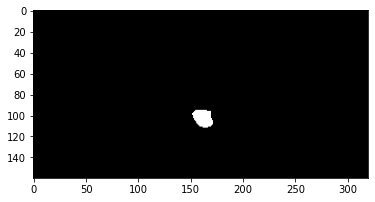

In [90]:
plt.imshow(detect_rock(np.array(Image_example)))

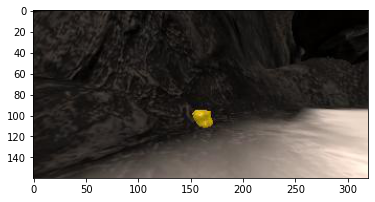

In [91]:
plt.imshow(Image_example
          )